### Sequential API, Functional API

---
#### Sequential API
- 간단한 모델을 구현하기에 적합하고 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단하다.
- 단일 입력 및 출력만 있으므로 레이어를 공유하거나 여러 입력 또는 출력을 가질 수 있는 모델을 생성할 수 없다.

#### Funcional API
- Funtional API는 Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있다.
- 여러 개의 입력 및 출력을 가진 모델을 구현하거나 층 간의 연결 및 연산을 수행하는 모델 구현 시 사용한다.

#### 성능 평가
<img src="./images/validation.png" width="700" style='margin-left: 0'>




In [1]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

# 전부 Dense layer라고 부른다.
# 학습할 데이터가 많으면 neuron의 개수를 더 많이 지정(예, 64, 128, 256 등)하거나
# 은닉층 수를 더 늘리면 된다.
# 학습할 데이터가 적으면 neuron의 개수 또는 은닉층 수를 줄이는 것이 좋다.

model = Sequential([
    # 전체 28 * 28(784)개의 feature로 flatten 진행
    # 첫 번째 입력 layer
    # 입력층
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),

    # 두 번째 Hudden layer
    # 은닉층
    Dense(64, activation='relu'),

    # 세 번째 Hudden layer
    # 은닉층
    Dense(128, activation='relu'),

    # 마지막 Output layer
    # 출력층
    Dense(10, activation='softmax')
])


# 파라미터 수 + (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수
# 이 파라미터 수에는 편향(bias) 파라미터도 포함되어야 하고
# 편향은 각 출력 뉴런에 더해지는 추가적인 파라미터 수 이다.

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [5]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [6]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.7552 - loss: 0.7082
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.8564 - loss: 0.3969
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.8730 - loss: 0.3483
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.8830 - loss: 0.3201
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8882 - loss: 0.3053
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.8896 - loss: 0.2993
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.8957 - loss: 0.2799
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.8994 - loss: 0.2653
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.9032 - loss: 0.2554
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.9084 - loss: 0.2452
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.9093 - loss: 0.2397
Epoch 12/20
938/938 ━━━━━━━━━━

In [7]:
print(history.history['loss'])
print('=' * 80)
history.history['accuracy']

[0.5265341401100159, 0.3859444558620453, 0.3446550667285919, 0.32051312923431396, 0.3036153316497803, 0.29387447237968445, 0.27816158533096313, 0.2688545882701874, 0.25980043411254883, 0.25127941370010376, 0.24292810261249542, 0.2366584688425064, 0.22889035940170288, 0.22164705395698547, 0.21719816327095032, 0.20930829644203186, 0.20519213378429413, 0.19775472581386566, 0.19334042072296143, 0.189190074801445]


[0.8138999938964844,
 0.8606666922569275,
 0.8739166855812073,
 0.8828333616256714,
 0.8880833387374878,
 0.8905166387557983,
 0.8956166505813599,
 0.8985000252723694,
 0.90256667137146,
 0.9059666395187378,
 0.9090166687965393,
 0.9103500247001648,
 0.9137166738510132,
 0.9166333079338074,
 0.91839998960495,
 0.9211500287055969,
 0.9219833612442017,
 0.9254500269889832,
 0.9276833534240723,
 0.9273999929428101]

In [8]:
# 훈련과 정답의 차원을 맞추기 위해 차원을 늘리는 작업
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [9]:
pred_prob = model.predict(np.expand_dims(test_images[10], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[2.9513421e-06 3.0390396e-08 2.8448850e-03 2.9189695e-10 9.9577087e-01
  6.1834817e-09 1.3812548e-03 1.3197810e-15 2.0351337e-08 3.4353426e-13]]


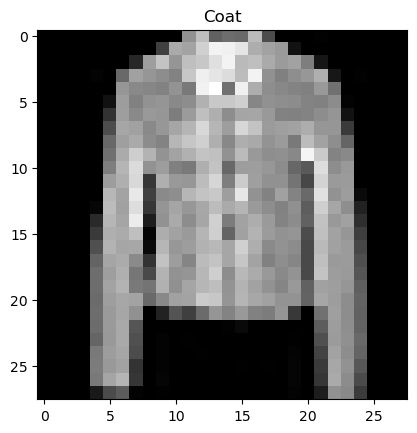

In [10]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(class_names[pred_prob.flatten().argsort()[::-1][0]])

plt.imshow(test_images[10], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [11]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8818 - loss: 0.3930


[0.3916245996952057, 0.8810999989509583]

### Validation

In [12]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [13]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [15]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 1s - 833us/step - acc: 0.8139 - loss: 0.5210 - val_acc: 0.8467 - val_loss: 0.4135
Epoch 2/20
1500/1500 - 1s - 567us/step - acc: 0.8594 - loss: 0.3852 - val_acc: 0.8605 - val_loss: 0.3832
Epoch 3/20
1500/1500 - 1s - 564us/step - acc: 0.8731 - loss: 0.3469 - val_acc: 0.8618 - val_loss: 0.3658
Epoch 4/20
1500/1500 - 1s - 593us/step - acc: 0.8806 - loss: 0.3214 - val_acc: 0.8801 - val_loss: 0.3275
Epoch 5/20
1500/1500 - 1s - 568us/step - acc: 0.8871 - loss: 0.3051 - val_acc: 0.8812 - val_loss: 0.3280
Epoch 6/20
1500/1500 - 1s - 687us/step - acc: 0.8923 - loss: 0.2910 - val_acc: 0.8833 - val_loss: 0.3227
Epoch 7/20
1500/1500 - 1s - 570us/step - acc: 0.8958 - loss: 0.2772 - val_acc: 0.8854 - val_loss: 0.3146
Epoch 8/20
1500/1500 - 1s - 580us/step - acc: 0.8990 - loss: 0.2666 - val_acc: 0.8808 - val_loss: 0.3301
Epoch 9/20
1500/1500 - 1s - 568us/step - acc: 0.9028 - loss: 0.2574 - val_acc: 0.8820 - val_loss: 0.3276
Epoch 10/20
1500/1500 - 1s - 574us/step - acc: 0.9076 -

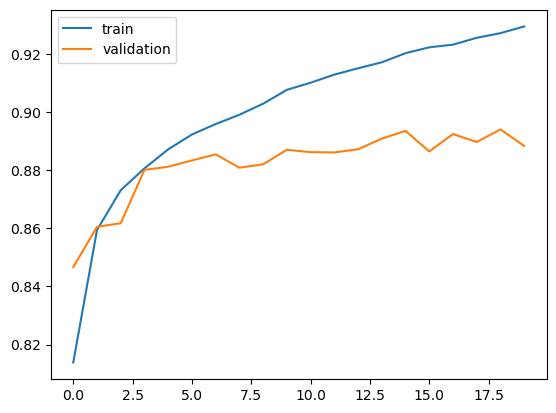

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[5.0423473e-06 2.1810355e-10 9.2574769e-01 2.9796190e-06 7.0331372e-02
  2.8764404e-11 3.9129821e-03 4.2369496e-13 1.5700632e-10 2.4224007e-14]]


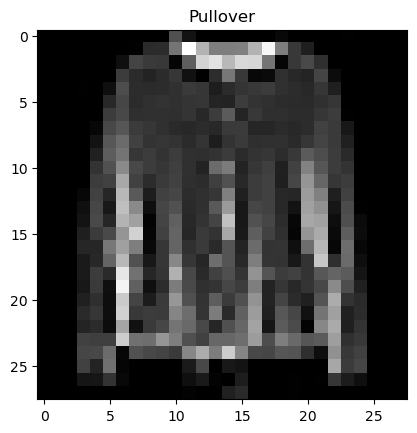

In [18]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

pred_prob = model.predict(np.expand_dims(test_images[25], axis=0))
print(pred_prob)

plt.imshow(test_images[25], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [19]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - acc: 0.8796 - loss: 0.3871


[0.3901776075363159, 0.8773999810218811]

### Funcional API

In [21]:
# call 함수 (매직 메소드)
class Test:
    def __call__(self,data):
        return data + 10

print(Test()(20))

30


In [32]:
# call 함수 덕분에 생성자 뒤에 값을 넣어줘서 사용이 가능하다.

from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input((INPUT_SIZE,INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model
    

In [38]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [39]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [40]:
model = create_model()
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [42]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - acc: 0.7421 - loss: 0.7509 - val_acc: 0.8470 - val_loss: 0.4250
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - acc: 0.8557 - loss: 0.4076 - val_acc: 0.8558 - val_loss: 0.3853
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - acc: 0.8702 - loss: 0.3562 - val_acc: 0.8665 - val_loss: 0.3583
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - acc: 0.8796 - loss: 0.3274 - val_acc: 0.8647 - val_loss: 0.3612
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8850 - loss: 0.3114 - val_acc: 0.8677 - val_loss: 0.3555
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - acc: 0.8909 - loss: 0.2939 - val_acc: 0.8733 - val_loss: 0.3341
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - acc: 0.8953 - loss: 0.2838 - val_acc: 0.8780 - val_loss: 0.3223
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - acc: 0.9015 - loss: 0.2689 - val_acc: 0.8827 - val_loss: 0.3180
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s

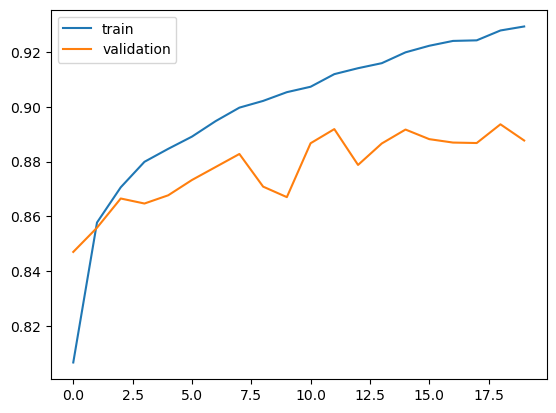

In [43]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [44]:
pred_prob = model.predict(np.expand_dims(test_images[8500], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2.4773367e-04 8.7014319e-12 9.9077648e-01 6.1009260e-08 6.9049204e-04
  5.8845097e-07 8.2845176e-03 2.0547313e-09 4.7625450e-09 4.4257500e-11]]


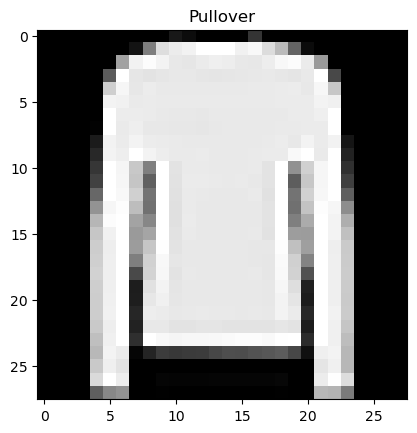

In [45]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(test_images[8500], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()